## YOLO Practice

In this section we will make some simple exercises to understand the YOLO-Ultralytics ecosystem.

As we explained before YOLO is a powerful object detection model, but it is not typically used on its own; instead, it requires an environment that handles preprocessing, inference, and postprocessing. The most common and user-friendly implementation today is the Ultralytics ecosystem, which wraps YOLO in a complete framework with tools for training, validation, prediction, and export. This environment includes pre-trained models, utilities for dataset handling, making it practical and accessible. Without such a framework, using YOLO directly would involve complex low-level coding and management of its architecture and weights.

### Exercise 1: First Detection with YOLOv8

In this exercise,we will perform object detection on an image using a pretrained YOLOv8 model within the Ultralytics framework.

**Instructions**:
- Load the `yolov8n.pt` model from the `ultralytics` package.
- Use a local image or an image URL as input.
- Display the image with bounding boxes and class labels for each detection.

**Results**
- Visualize detections over the image
- Print the number of objects detected per class.


You can use next image for testing: [image](https://static.dw.com/image/18585189_1004.webp)

**Extra**
- Try to load an image from your computer using `cv2.imread` [example](https://www.geeksforgeeks.org/python/python-opencv-cv2-imread-method/) or PIL `open` [example](https://www.geeksforgeeks.org/python/python-pil-image-open-method/)

In [31]:
from ultralytics import YOLO
from collections import Counter
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load the YOLOv8n model
model = YOLO('yolov8n.pt')

# Run detection on a image
results = model('https://static.dw.com/image/18585189_1004.webp')


Found https://static.dw.com/image/18585189_1004.webp locally at 18585189_1004.webp
image 1/1 C:\Users\gabri\PycharmProjects\cursSocib\2_AA\18585189_1004.webp: 288x640 16 persons, 1 backpack, 1 umbrella, 52.9ms
Speed: 2.0ms preprocess, 52.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)


It's very interesting (necessary) to deep in the results type: [Documentation](https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Results)

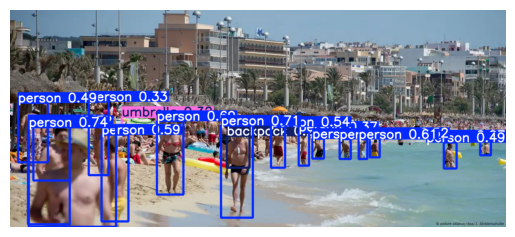

Detected objects per class:
person: 16
umbrella: 1
backpack: 1


In [16]:
# Mostra la imatge amb bounding boxes i etiquetes
img_with_boxes = results[0].plot()  # Aquesta imatge ja té les anotacions dibuixades
img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()

# Count number of objects per class
class_names = results[0].names
class_ids = results[0].boxes.cls.int().tolist() # 
counts = Counter(class_ids)

print("Detected objects per class:")
for class_id, count in counts.items():
    print(f"{class_names[class_id]}: {count}")

### Exercise 2: Filter Detections by Class

Show only the detections of a specific class (e.g., people or bicycles) in an image.

**Instructions**:
- Reuse the code from Exercise 1 (as much as you can).
- Filter the detection results to only include objects of class `"person"`.
- Display the filtered results over the original image.

**Extra**
- Try to filter detections with confidence greater than 0.5.

In [32]:
results[0].names;

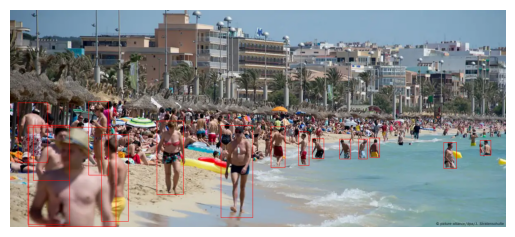

In [43]:
humans = np.copy(results[0].orig_img)
humans = cv2.cvtColor(humans, cv2.COLOR_BGR2RGB)

for obj in results[0].boxes:
    points = obj.xyxy.int().numpy()
    if obj.cls < 1:
        cv2.rectangle(humans,points[0][:2], points[0][2:],(255,0,0))  
    
plt.imshow(humans)
plt.axis('off')
plt.show()

### Exercise 3: Export Detections to CSV

In this exercise we will save object detection results to a `.csv` file.

**Instructions**:
- Use the `yolov8n.pt` model to detect objects in an image.
- For each detection, store: class name, confidence score, and bounding box coordinates (`x1, y1, x2, y2`).
- Write the results to a CSV file using `pandas` or `csv`.

In [46]:
import pandas as pd

# Extract info from detections
detections = results[0].boxes
class_ids = detections.cls.numpy()
confidences = detections.conf.numpy()
boxes = detections.xyxy.numpy()
class_names = results[0].names

# Build rows for CSV
data = []
for cls_id, conf, (x1, y1, x2, y2) in zip(class_ids, confidences, boxes):
    data.append({
        "class": class_names[int(cls_id)],
        "confidence": round(float(conf), 3),
        "x1": round(float(x1), 1),
        "y1": round(float(y1), 1),
        "x2": round(float(x2), 1),
        "y2": round(float(y2), 1)
    })

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv("detections.csv", index=False)

print("Detections saved to detections.csv")


Detections saved to detections.csv


### Exercise 4: Image Segmentation

In this exercises we will apply object segmentation on an image using a pretrained segmentation model.

**Instructions**:
- Use the `yolov8n-seg.pt` model.
- Predict segmentations for an input image.
- Display the image with both bounding boxes and segmentation masks.



Found https://static.dw.com/image/18585189_1004.webp locally at 18585189_1004.webp
image 1/1 C:\Users\gabri\PycharmProjects\cursSocib\2_AA\18585189_1004.webp: 288x640 18 persons, 3 umbrellas, 64.2ms
Speed: 2.0ms preprocess, 64.2ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 640)


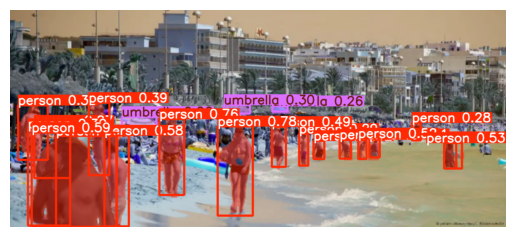

In [52]:
# Load segmentation model
model = YOLO("yolov8n-seg.pt")

# Run prediction
results = model('https://static.dw.com/image/18585189_1004.webp')  # Replace with your image path

# Show the result (includes masks and boxes)

im_seg = results[0].plot()  # draw masks + boxes
plt.imshow(im_seg)
plt.axis("off")
plt.show()

#### 4.1 Mask inspection
Let's gain a deeper understanding of the mask format. In this (sub)exercises we will try to draw the mask with the highest confidence.

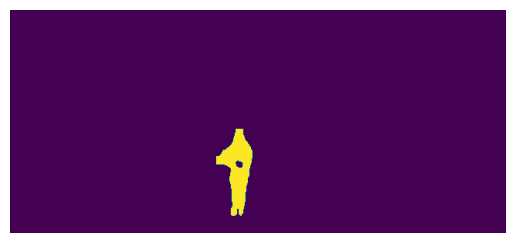

In [71]:
#results[0].boxes.conf
mask_result = results[0].masks[0].data.numpy()
plt.axis("off")
plt.imshow(mask_result[0,:,:]);

### Exercise 5: Detection vs. Segmentation Comparison

This exercise pretends to visually compare object detection and segmentation results on the same image.

**Instructions**:
- Use both `yolov8n.pt` (detection) and `yolov8n-seg.pt` (segmentation).
- Run both predictions on the same image.
- Show the two outputs side by side.

**Final Questions**:
- How does segmentation improve or worsen the results compared to detection?
- In what scenarios would segmentation be more useful?